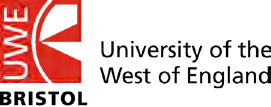

# Comparative Analysis the Trustworthy of stock price forecasting using ARIMA and LSTM

The purpose of this final report aims to evaluate the predictability for the stock price of Power Asset (0006.HK) between using ARIMA and LSTM.

Author by Wong Hau Hang, Tony

Information Technology Project (UFCFFC-30-3)

Final Project Analysis Result and Program Coding

In [2]:
import warnings
warnings.filterwarnings('ignore')

#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('6HK.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-29,66.000000,66.099998,65.849998,65.949997,62.823124,2195249
1,2017-12-28,66.000000,66.150002,65.900002,66.000000,62.870754,2607547
2,2017-12-27,65.800003,66.000000,65.400002,65.849998,62.727863,1956499
3,2017-12-22,65.550003,65.650002,65.250000,65.650002,62.537354,1802472
4,2017-12-21,65.000000,65.599998,65.000000,65.300003,62.203949,3177099


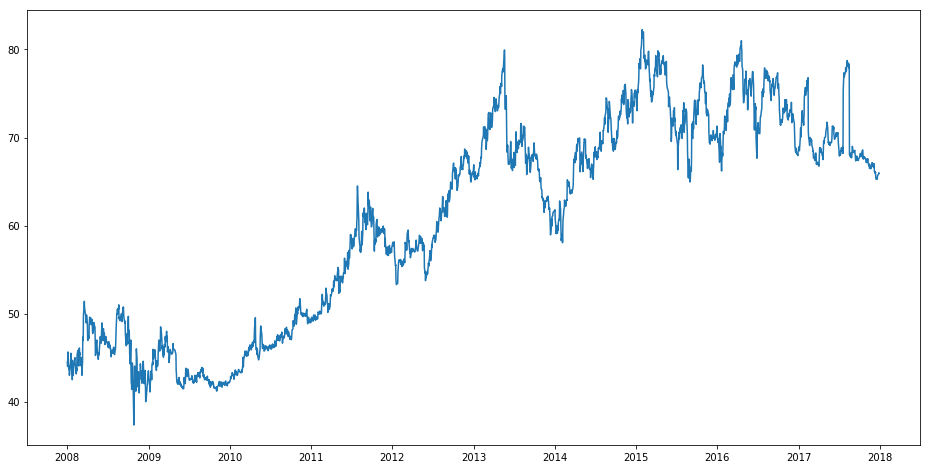

In [4]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

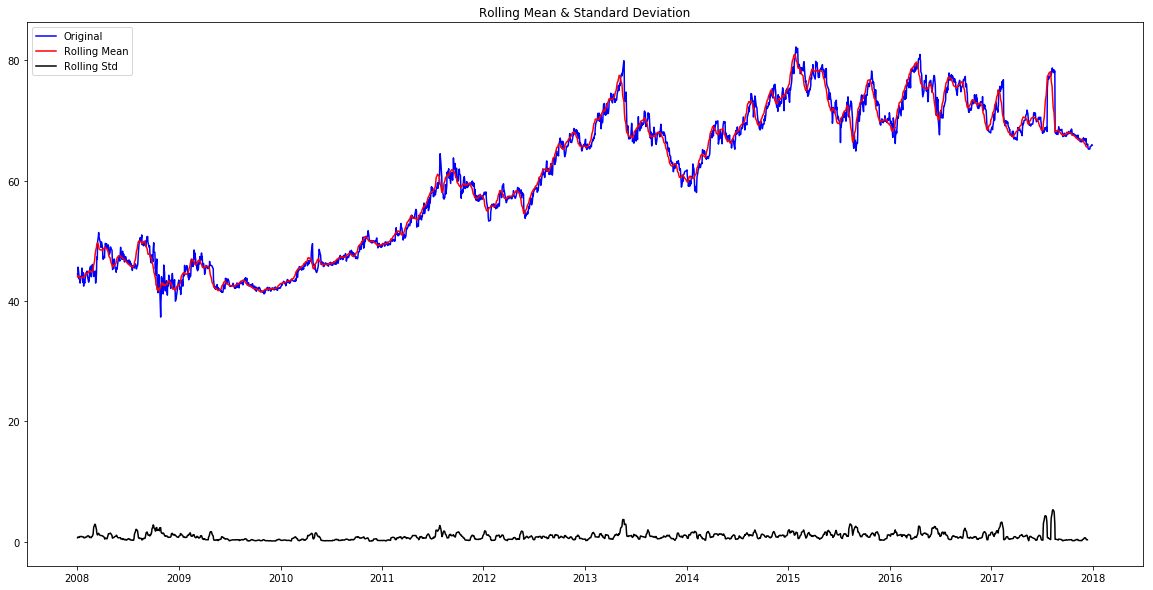

Results of Dickey-Fuller Test:
Test Statistic                   -1.172698
p-value                           0.685229
#Lags Used                        4.000000
Number of Observations Used    2465.000000
Critical Value (1%)              -3.433006
Critical Value (5%)              -2.862713
Critical Value (10%)             -2.567395
dtype: float64


In [31]:
test_stationarity(df['Close'])

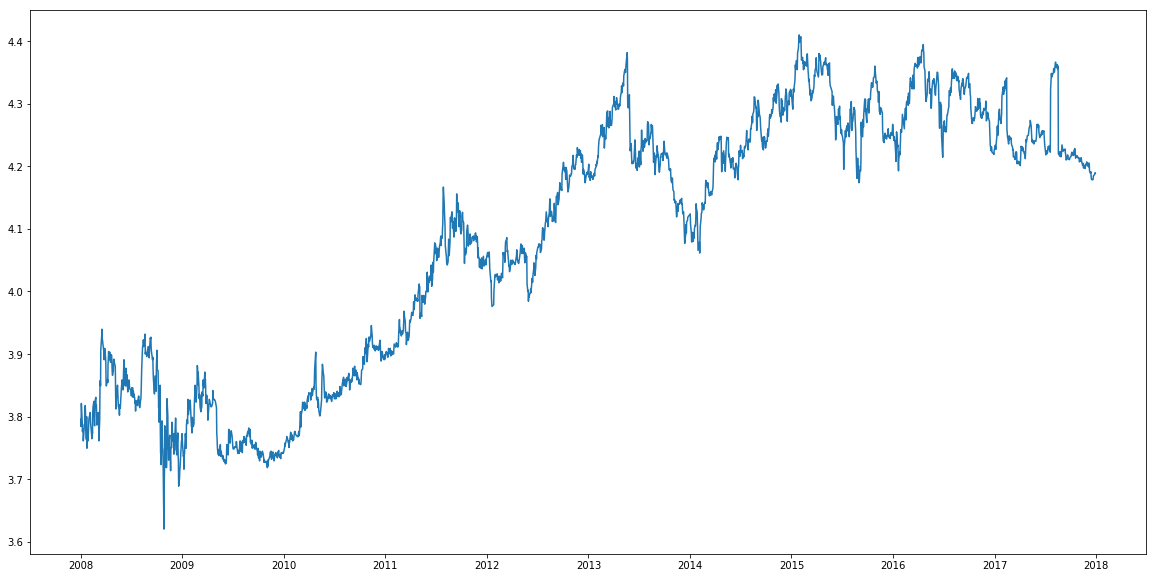

In [33]:
df_log = np.log(df['Close'])
plt.plot(df_log)

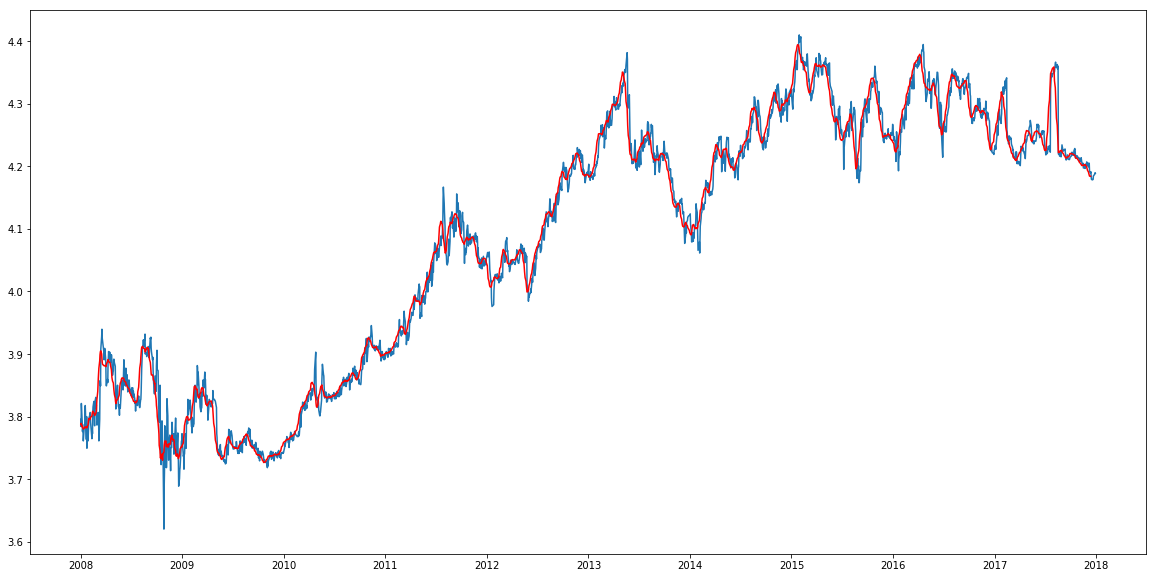

In [34]:
moving_avg = df_log.rolling(12).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [35]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(12)

Date
2017-12-29        NaN
2017-12-28        NaN
2017-12-27        NaN
2017-12-22        NaN
2017-12-21        NaN
2017-12-20        NaN
2017-12-19        NaN
2017-12-18        NaN
2017-12-15        NaN
2017-12-14        NaN
2017-12-13        NaN
2017-12-12    0.00571
Name: Close, dtype: float64

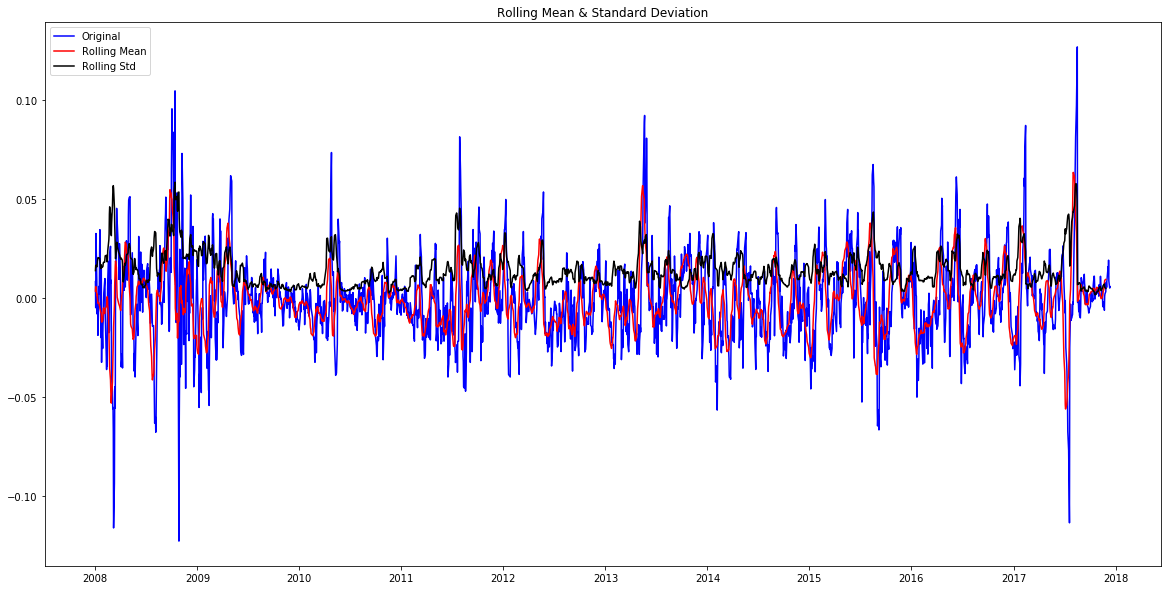

Results of Dickey-Fuller Test:
Test Statistic                -1.063593e+01
p-value                        5.072517e-19
#Lags Used                     2.100000e+01
Number of Observations Used    2.437000e+03
Critical Value (1%)           -3.433036e+00
Critical Value (5%)           -2.862727e+00
Critical Value (10%)          -2.567402e+00
dtype: float64


In [36]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

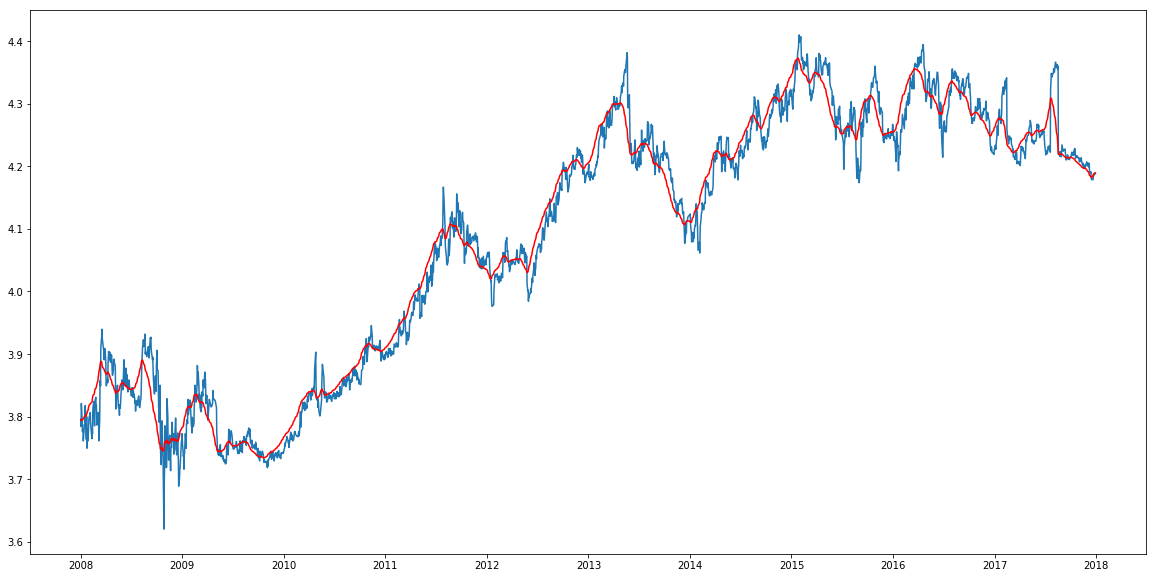

In [37]:
expwighted_avg = df_log.ewm(halflife=12).mean()
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

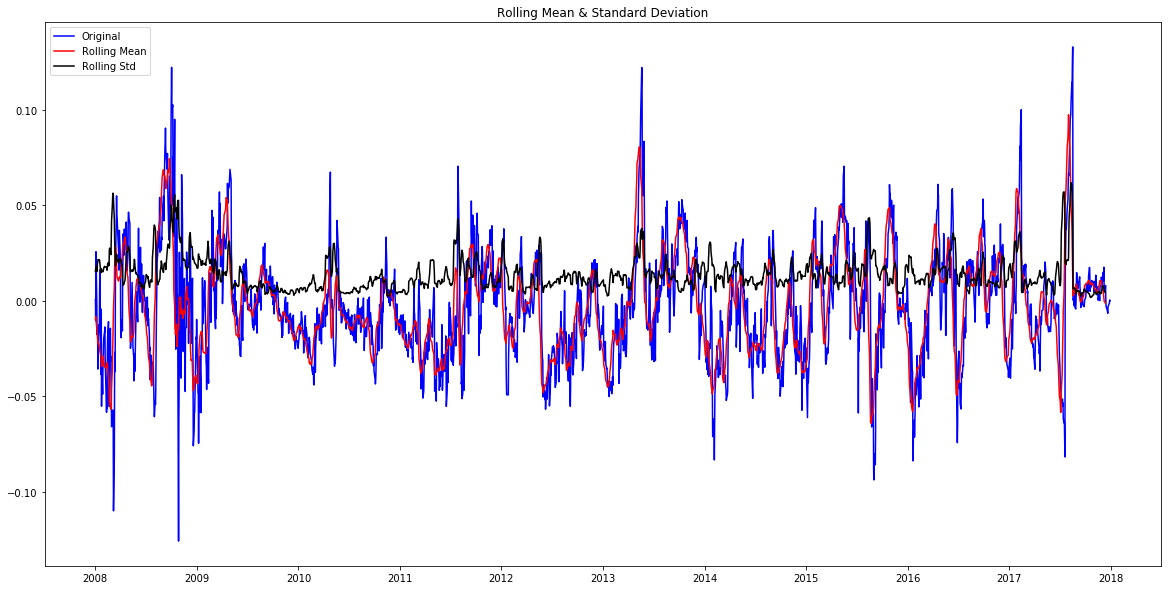

Results of Dickey-Fuller Test:
Test Statistic                -8.580033e+00
p-value                        7.773305e-14
#Lags Used                     1.600000e+01
Number of Observations Used    2.453000e+03
Critical Value (1%)           -3.433019e+00
Critical Value (5%)           -2.862719e+00
Critical Value (10%)          -2.567398e+00
dtype: float64


In [38]:
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff)

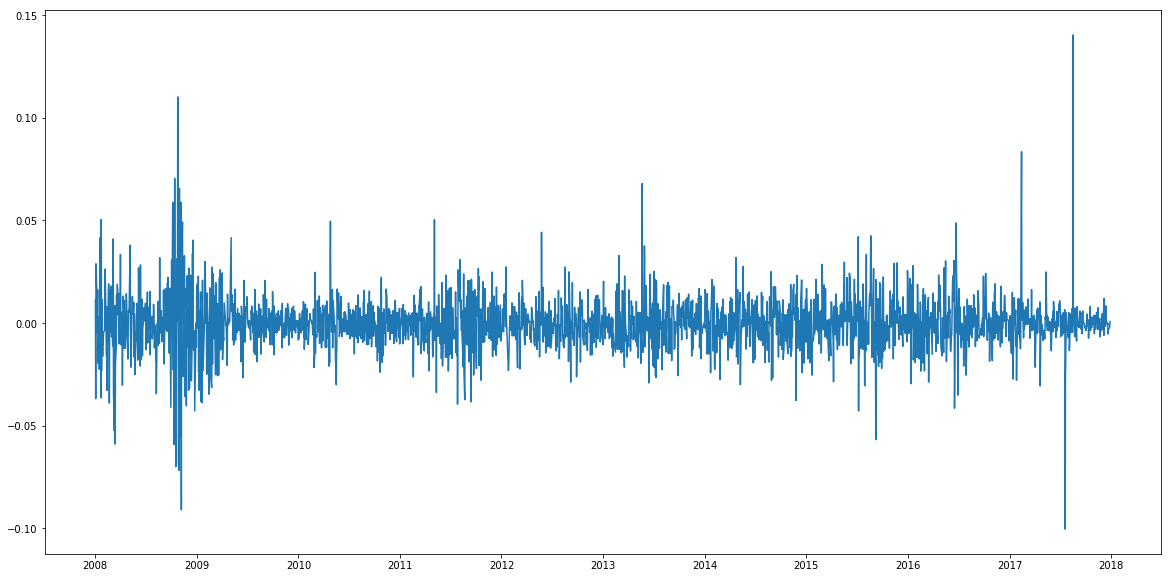

In [39]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

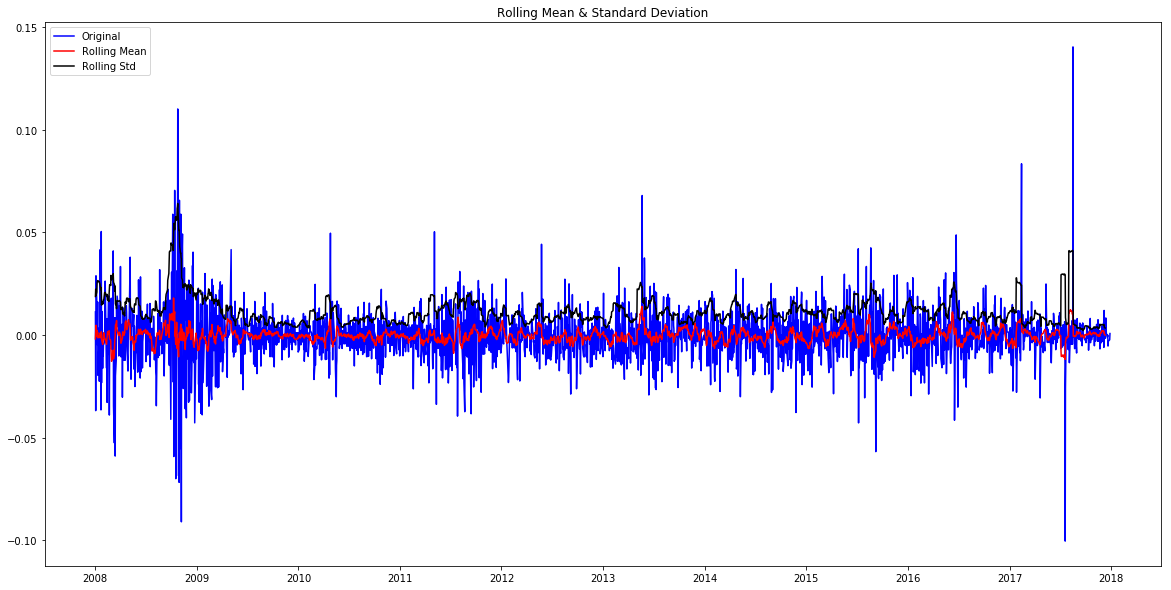

Results of Dickey-Fuller Test:
Test Statistic                -1.773758e+01
p-value                        3.413358e-30
#Lags Used                     9.000000e+00
Number of Observations Used    2.459000e+03
Critical Value (1%)           -3.433012e+00
Critical Value (5%)           -2.862716e+00
Critical Value (10%)          -2.567396e+00
dtype: float64


In [40]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2469
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2923.401
Method:                       css-mle   S.D. of innovations              0.791
Date:                Tue, 01 Jan 2019   AIC                           5852.802
Time:                        22:09:23   BIC                           5870.236
Sample:                             1   HQIC                          5859.135
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0087      0.016     -0.553      0.580      -0.039       0.022
ar.L1.D.Close    -0.0133      0.020     -0.661      0.509      -0.053       0.026
                                    Root

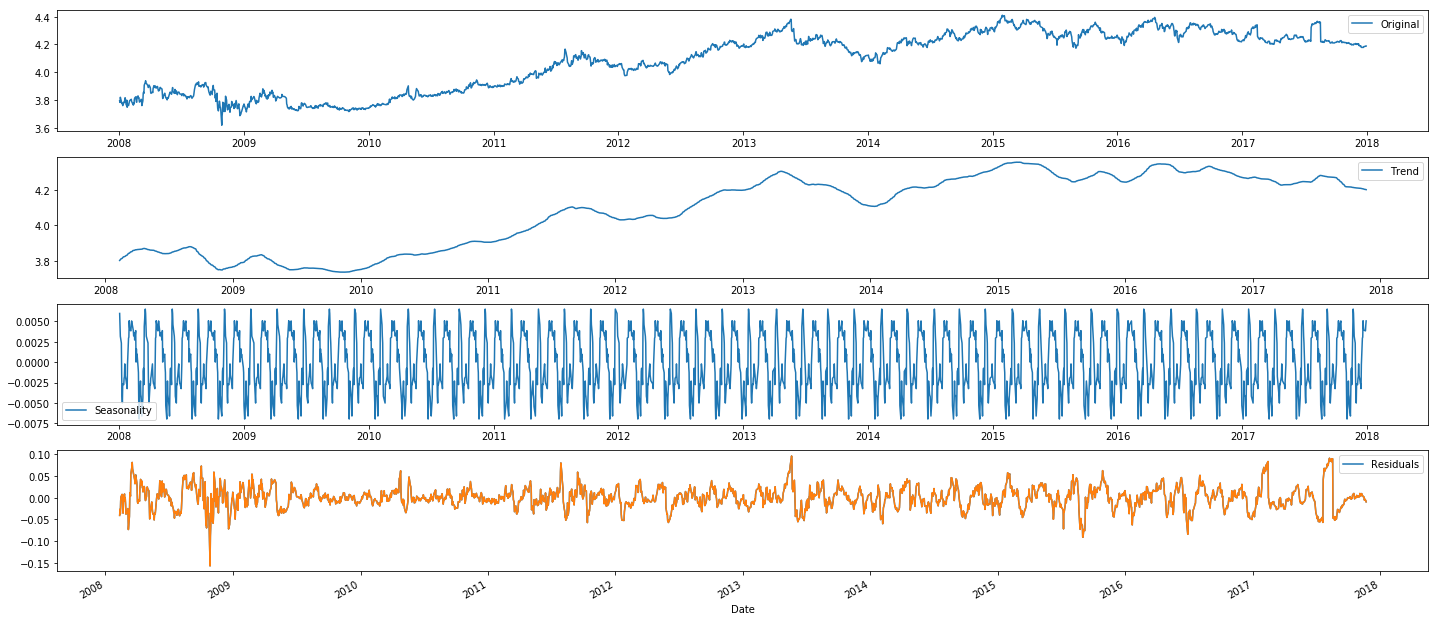

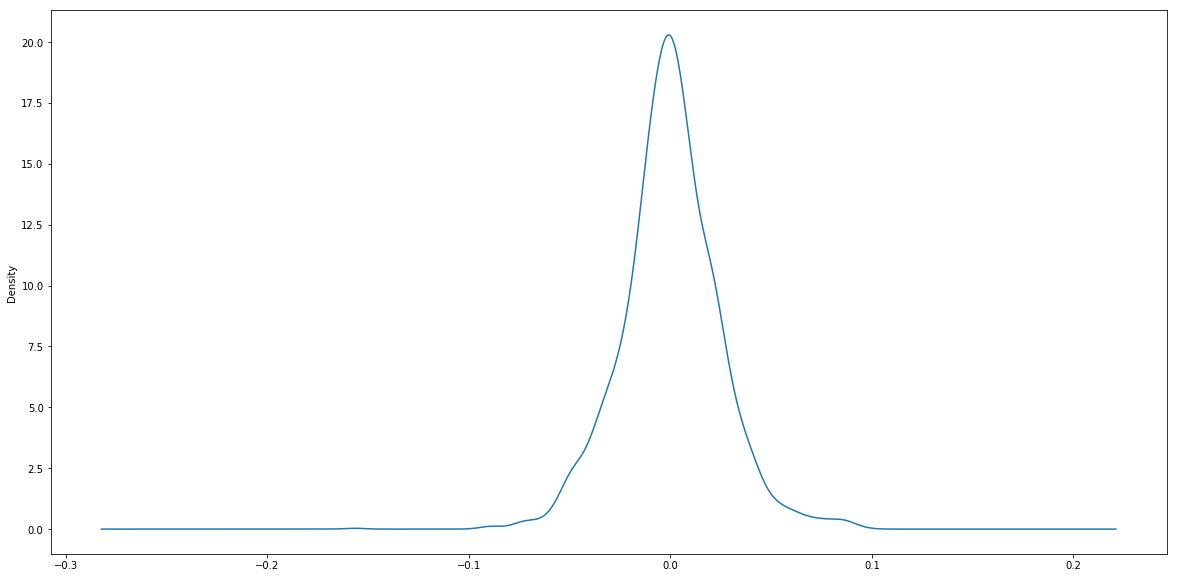

count    2418.000000
mean        0.000068
std         0.024311
min        -0.156470
25%        -0.013194
50%        -0.000243
75%         0.013981
max         0.095184
Name: Close, dtype: float64


In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
decomposition = seasonal_decompose(df_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# fit model
model = ARIMA(df['Close'], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

residual.plot()
pyplot.show()
residual.plot(kind='kde')
pyplot.show()
print(residual.describe())

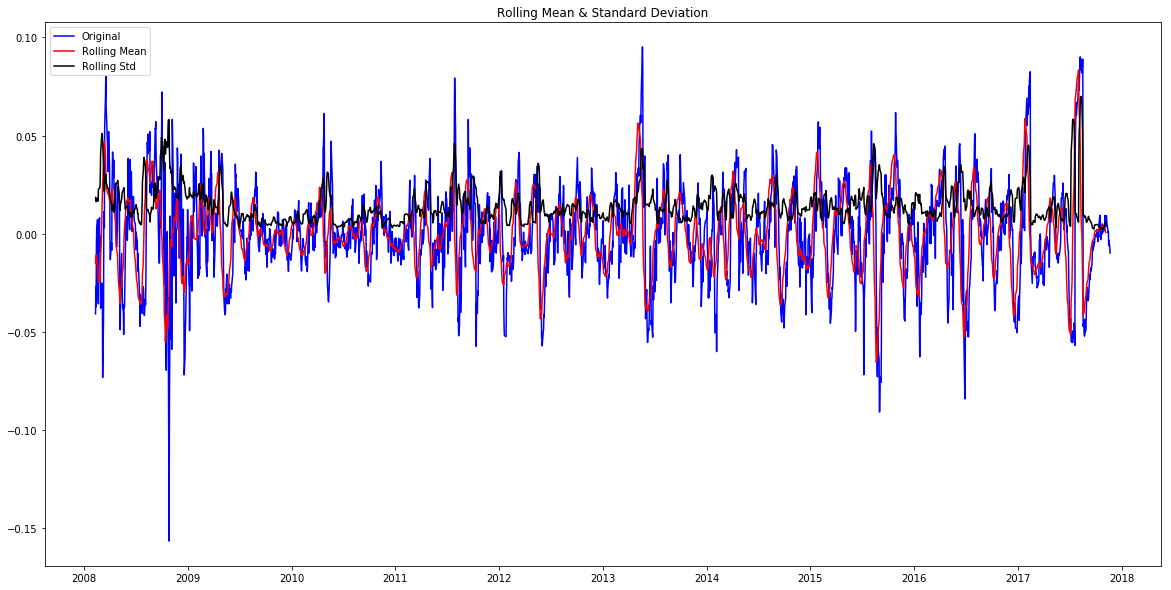

Results of Dickey-Fuller Test:
Test Statistic                -1.354015e+01
p-value                        2.522390e-25
#Lags Used                     2.200000e+01
Number of Observations Used    2.395000e+03
Critical Value (1%)           -3.433083e+00
Critical Value (5%)           -2.862748e+00
Critical Value (10%)          -2.567413e+00
dtype: float64


In [43]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose)

In [44]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [45]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

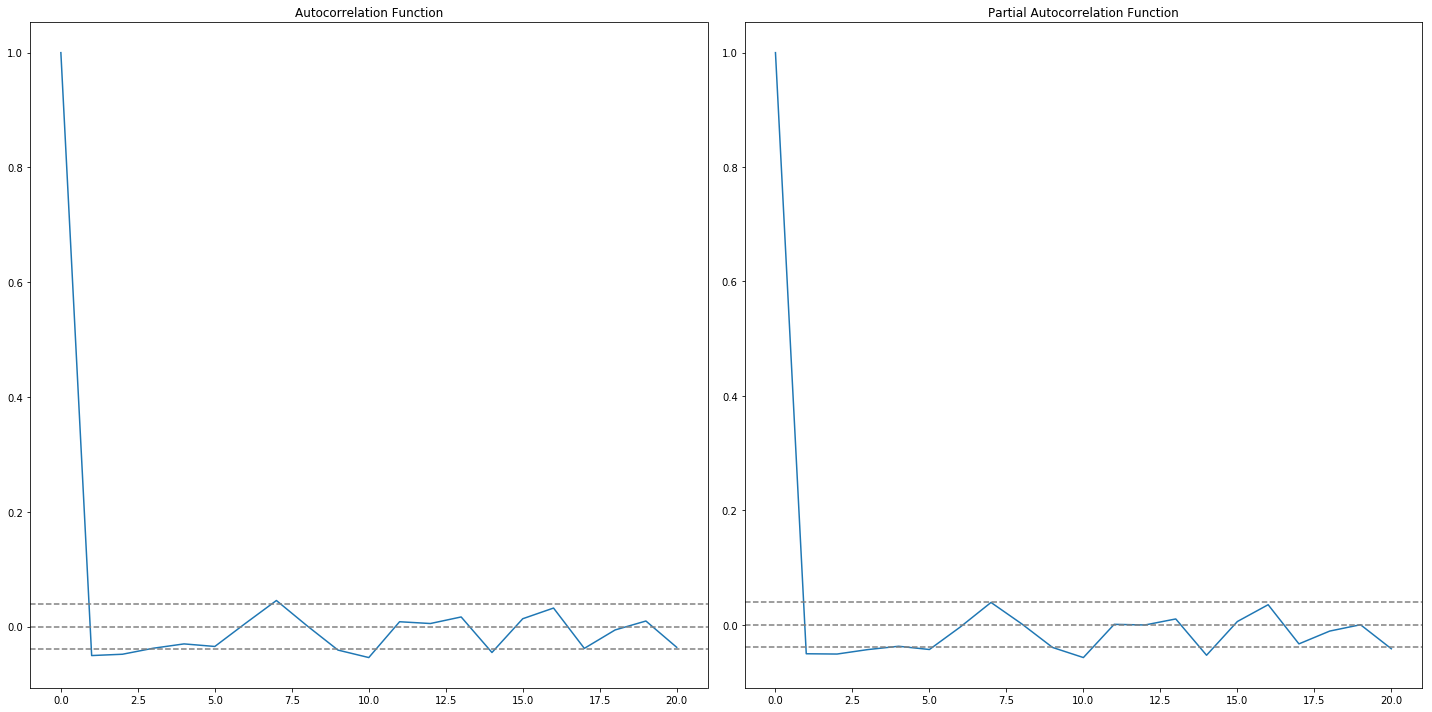

In [46]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'RSS: 0.4359')

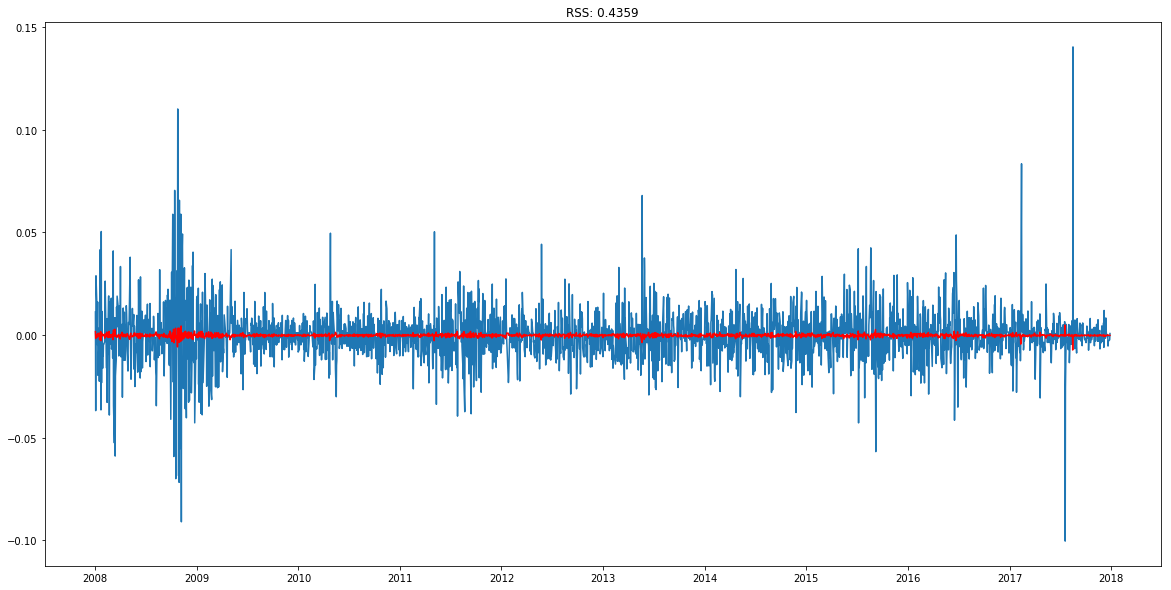

In [50]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order=(1, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff)**2))

In [88]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head(30))

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head(30))

predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(30)

Date
2017-12-28   -0.000160
2017-12-27   -0.000206
2017-12-22   -0.000052
2017-12-21   -0.000014
2017-12-20    0.000103
2017-12-19   -0.000168
2017-12-18   -0.000129
2017-12-15   -0.000168
2017-12-14   -0.000206
2017-12-13   -0.000361
2017-12-12   -0.000591
2017-12-11   -0.000091
2017-12-08   -0.000129
2017-12-07   -0.000359
2017-12-06   -0.000776
2017-12-05    0.000135
2017-12-04   -0.000471
2017-12-01   -0.000168
2017-11-30   -0.000016
2017-11-29   -0.000092
2017-11-28   -0.000395
2017-11-27   -0.000281
2017-11-24    0.000021
2017-11-23   -0.000168
2017-11-22   -0.000168
2017-11-21    0.000174
2017-11-20   -0.000282
2017-11-17   -0.000244
2017-11-16   -0.000016
2017-11-15   -0.000168
dtype: float64
Date
2017-12-28   -0.000160
2017-12-27   -0.000366
2017-12-22   -0.000418
2017-12-21   -0.000432
2017-12-20   -0.000329
2017-12-19   -0.000496
2017-12-18   -0.000625
2017-12-15   -0.000793
2017-12-14   -0.000999
2017-12-13   -0.001361
2017-12-12   -0.001951
2017-12-11   -0.002042
2017-12-0

Date
2008-01-02    3.795430
2008-01-03    3.793734
2008-01-04    3.795364
2008-01-07    3.796337
2008-01-08    3.796274
2008-01-09    3.796615
2008-01-10    3.797600
2008-01-11    3.796777
2008-01-14    3.796599
2008-01-15    3.796939
2008-01-16    3.795969
2008-01-17    3.795577
2008-01-18    3.797846
2008-01-21    3.798656
2008-01-22    3.796978
2008-01-23    3.799701
2008-01-24    3.798691
2008-01-25    3.799444
2008-01-28    3.798794
2008-01-29    3.798616
2008-01-30    3.798268
2008-01-31    3.798209
2008-02-01    3.798150
2008-02-04    3.798149
2008-02-05    3.799110
2008-02-06    3.800609
2008-02-11    3.799962
2008-02-12    3.800536
2008-02-13    3.799043
2008-02-14    3.798707
dtype: float64

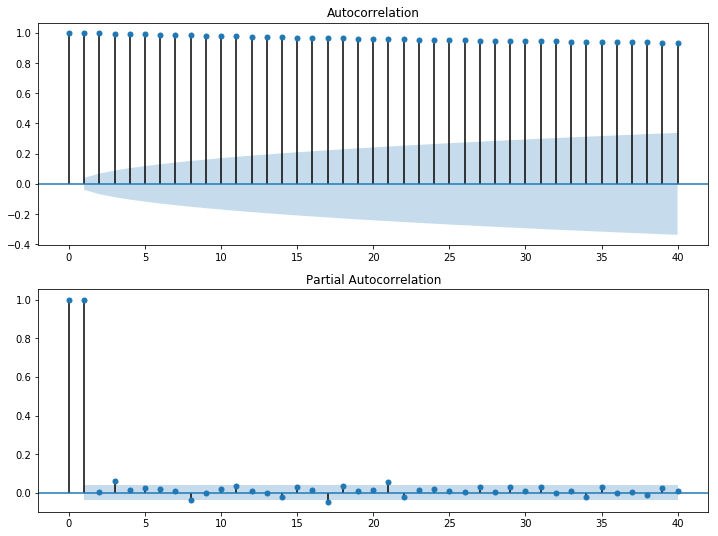

In [57]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Close'].values.squeeze(), lags=40, fft=True, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Close'], lags=40,ax=ax2)

AIC= 5852.801710561054
BIC= 5870.23641602909
RMSE= 9.798984112591537
Date
2017-12-29    65.949997
2017-12-28    66.000000
2017-12-27    65.849998
2017-12-22    65.650002
2017-12-21    65.300003
2017-12-20    65.300003
2017-12-19    65.250000
2017-12-18    65.250000
2017-12-15    65.300003
2017-12-14    65.550003
2017-12-13    66.099998
2017-12-12    66.000000
2017-12-11    65.949997
2017-12-08    66.199997
2017-12-07    67.000000
2017-12-06    66.599998
2017-12-05    67.000000
2017-12-04    67.000000
2017-12-01    66.800003
2017-11-30    66.699997
2017-11-29    67.000000
2017-11-28    67.150002
2017-11-27    66.900002
2017-11-24    66.900002
2017-11-23    66.900002
2017-11-22    66.449997
2017-11-21    66.599998
2017-11-20    66.699997
2017-11-17    66.500000
2017-11-16    66.500000
                ...    
2008-02-14    44.950001
2008-02-13    43.500000
2008-02-12    43.849998
2008-02-11    43.150002
2008-02-06    44.299999
2008-02-05    45.000000
2008-02-04    44.849998
2008-02-01    

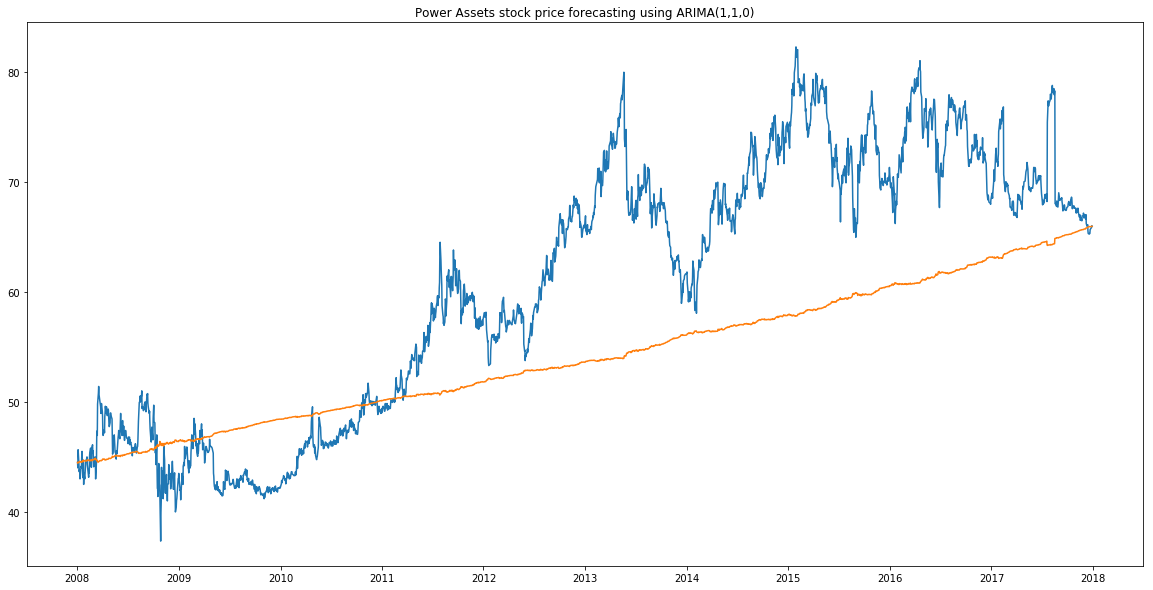

In [90]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df['Close'])
plt.plot(predictions_ARIMA)
plt.title('Power Assets stock price forecasting using ARIMA(1,1,0)')
arima_model = ARIMA(df['Close'],order=(1,1,0))
arima_fit = arima_model.fit()
print('AIC=',arima_fit.aic)
print('BIC=',arima_fit.bic)
print('RMSE=', np.sqrt(sum((predictions_ARIMA-df['Close'])**2)/len(df['Close'])))
print(df['Close'], predictions_ARIMA)

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2469
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2923.401
Method:                       css-mle   S.D. of innovations              0.791
Date:                Tue, 01 Jan 2019   AIC                           5852.802
Time:                        22:13:20   BIC                           5870.236
Sample:                             1   HQIC                          5859.135
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0087      0.016     -0.553      0.580      -0.039       0.022
ar.L1.D.Close    -0.0133      0.020     -0.661      0.509      -0.053       0.026
                                    Root

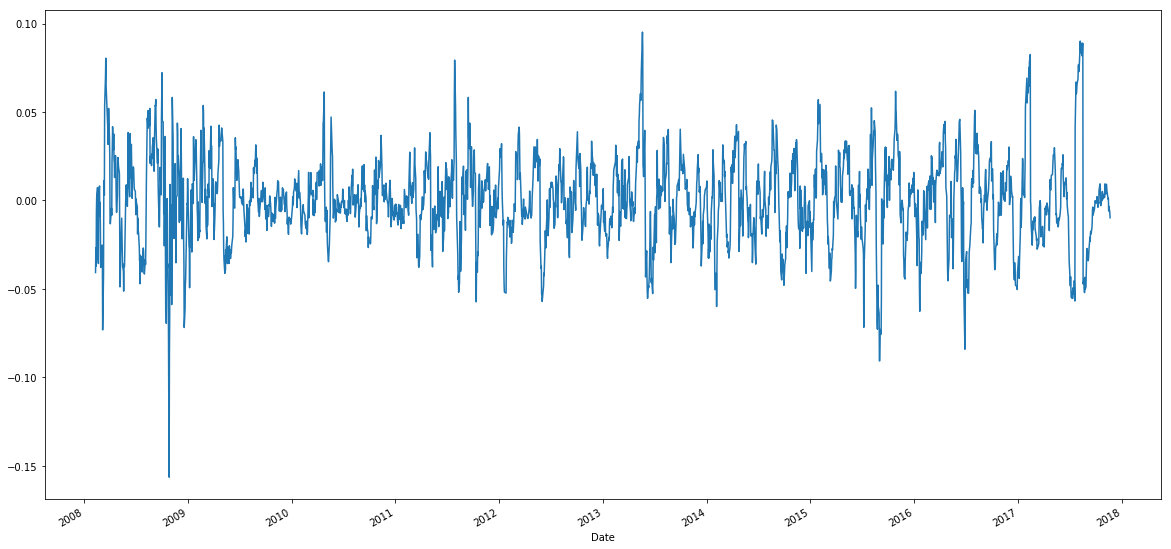

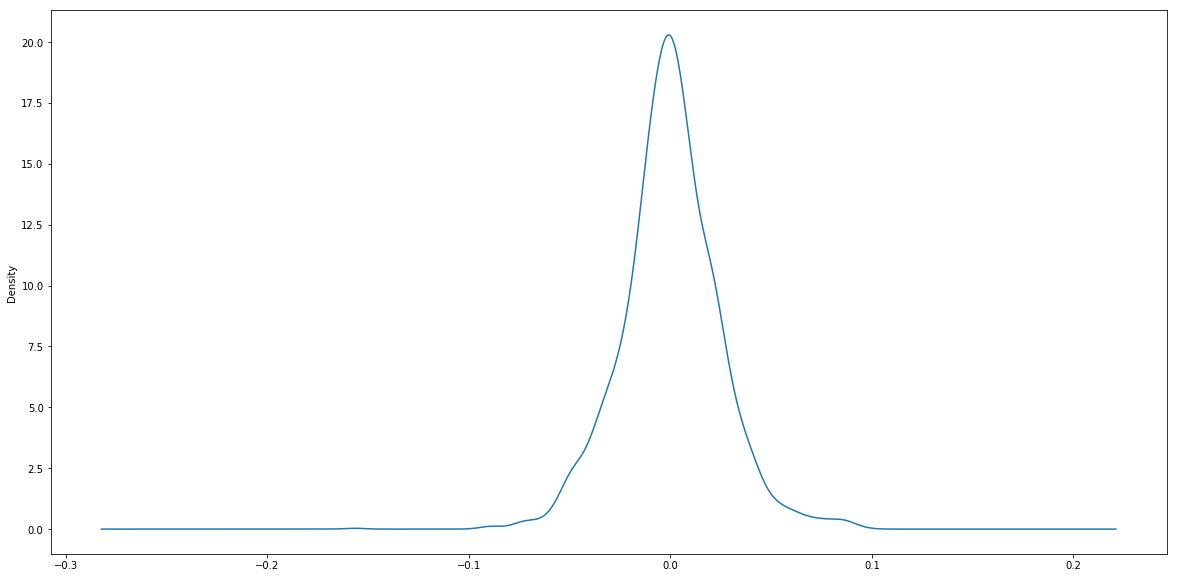

count    2418.000000
mean        0.000068
std         0.024311
min        -0.156470
25%        -0.013194
50%        -0.000243
75%         0.013981
max         0.095184
Name: Close, dtype: float64


In [102]:
# fit model
model = ARIMA(df['Close'], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

residual.plot()
pyplot.show()
residual.plot(kind='kde')
pyplot.show()
print(residual.describe())

# Auto ARIMA

In [80]:
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:1729]
valid = data[1729:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=741)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3796.253, BIC=3823.492, Fit time=25.943 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4896.020, BIC=4906.915, Fit time=0.174 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4441.401, BIC=4463.192, Fit time=2.867 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3807.785, BIC=3829.576, Fit time=10.405 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3799.704, BIC=3832.391, Fit time=25.017 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=4890.176, BIC=4911.967, Fit time=1.685 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=3798.482, BIC=3831.169, Fit time=44.276 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3799.354, BIC=3837.488, Fit time=48.980 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal

# Results

In [81]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

18.789427002774218

RMSE= 9.798984112591537


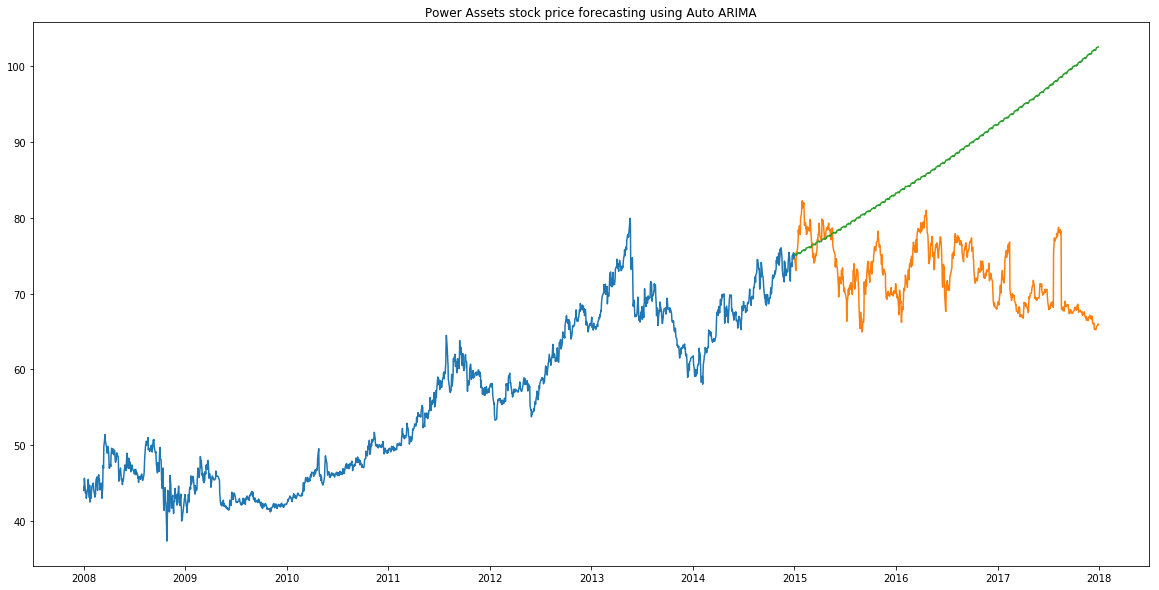

In [87]:
#plot
plt.title('Power Assets stock price forecasting using Auto ARIMA')
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
print('RMSE=', np.sqrt(sum((predictions_ARIMA-df['Close'])**2)/len(df['Close'])))

# Long Short Term Memory (LSTM)

In [16]:
import warnings
warnings.filterwarnings('ignore')

#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1729,:]
valid = dataset[1729:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 222s - loss: 0.0021


# Results

In [17]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1.5280329744974008

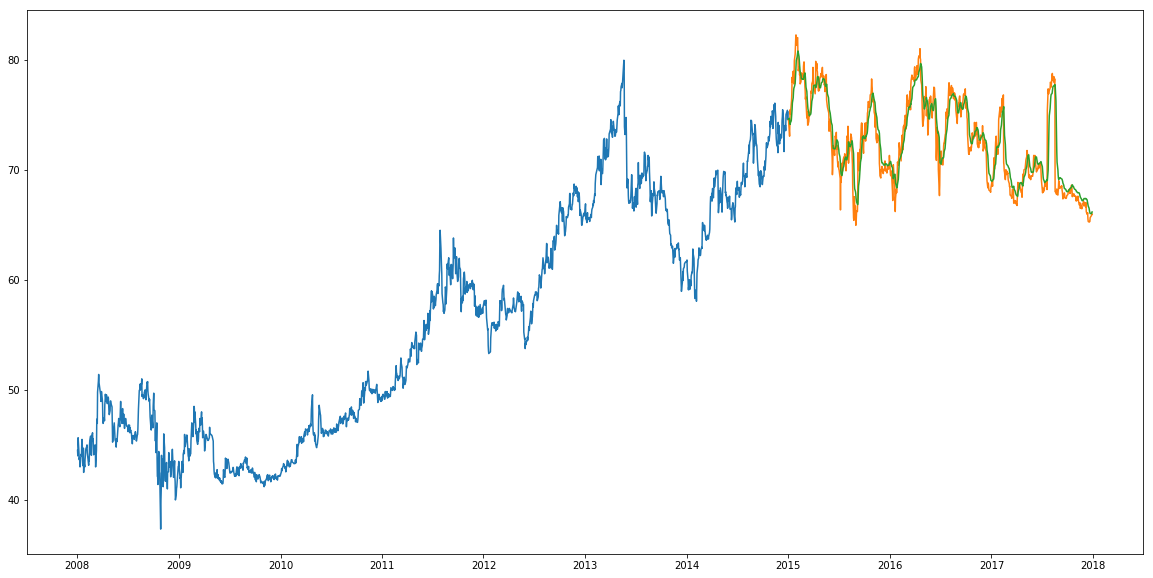

In [18]:
#for plotting
train = new_data[:1729]
valid = new_data[1729:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])